# Phase 2: Image Generation

In [1]:
!pip install --upgrade diffusers transformers -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 26.7 MB/s eta 0:00:00


In [2]:
!pip install accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 4.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [3]:
import torch
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

## Configuration Options

In [5]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
SEED = 42
GENERATOR = torch.Generator(DEVICE).manual_seed(SEED)
IMAGE_GEN_STEPS = 35
IMAGE_GEN_MODEL_ID = "stabilityai/stable-diffusion-2"
IMAGE_GEN_SIZE = (400, 400)
IMAGE_GEN_GUIDANCE_SCALE = 9

In [24]:
image_gen_model = StableDiffusionPipeline.from_pretrained(
    IMAGE_GEN_MODEL_ID,
    torch_dtype=torch.float16,
    variant='fp16'
)

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

In [25]:
image_gen_model = image_gen_model.to(DEVICE)

In [26]:
def generate_image(prompt, model):
    image = model(
        prompt, num_inference_steps=IMAGE_GEN_STEPS,
        generator=GENERATOR,
        guidance_scale=IMAGE_GEN_GUIDANCE_SCALE
    ).images[0]

    image = image.resize(IMAGE_GEN_SIZE)
    return image

  0%|          | 0/35 [00:00<?, ?it/s]

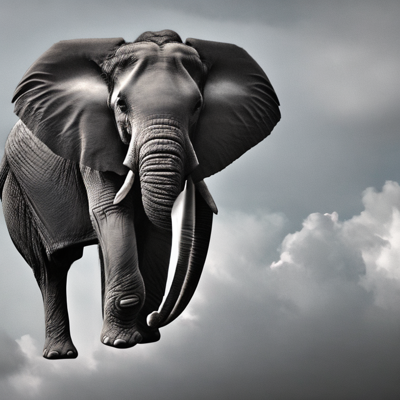

In [29]:
generate_image("An elephant on a cloud", image_gen_model)

  0%|          | 0/35 [00:00<?, ?it/s]

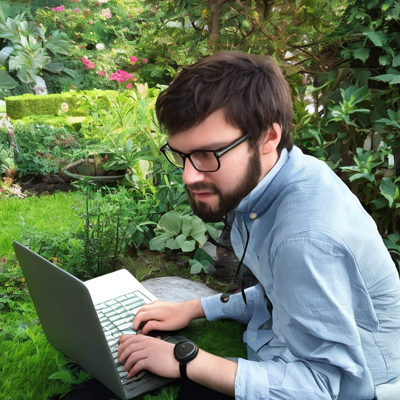

In [15]:
generate_image("Programmer in a garden", image_gen_model)

  0%|          | 0/35 [00:00<?, ?it/s]

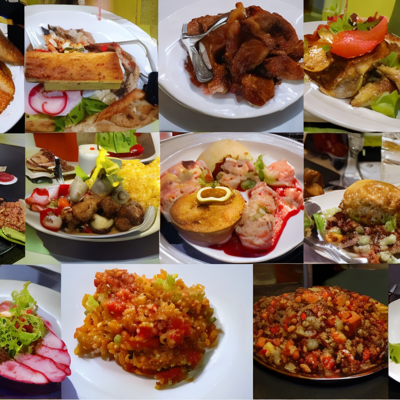

In [16]:
generate_image("Delicious Food", image_gen_model)

  0%|          | 0/35 [00:00<?, ?it/s]

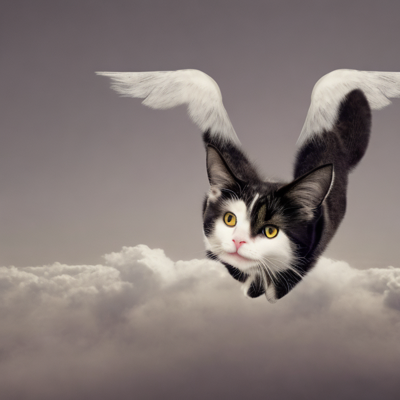

In [21]:
generate_image("A cat with wings is flying over the clouds", image_gen_model)

  0%|          | 0/35 [00:00<?, ?it/s]

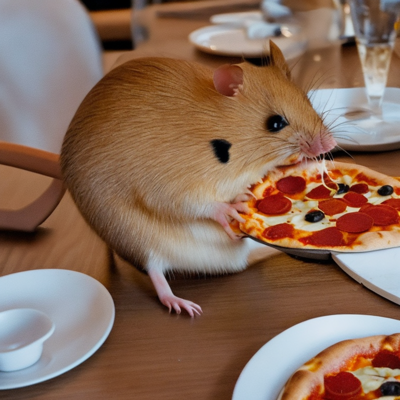

In [23]:
generate_image("A fat mouse eating a pizza on dinner table", image_gen_model)